<a href="https://colab.research.google.com/github/tithee22/DeepLearning/blob/main/brain_tumor_detection_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p ./kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot create regular file '/root/.kaggle/': Not a directory


In [2]:
!kaggle datasets download -d sartajbhuvaji/brain-tumor-classification-mri

Dataset URL: https://www.kaggle.com/datasets/sartajbhuvaji/brain-tumor-classification-mri
License(s): MIT
 76% 66.0M/86.8M [00:00<00:00, 108MB/s]
100% 86.8M/86.8M [00:00<00:00, 107MB/s]


In [3]:
!unzip /content/brain-tumor-classification-mri.zip -d /content/


Archive:  /content/brain-tumor-classification-mri.zip
  inflating: /content/Testing/glioma_tumor/image(1).jpg  
  inflating: /content/Testing/glioma_tumor/image(10).jpg  
  inflating: /content/Testing/glioma_tumor/image(100).jpg  
  inflating: /content/Testing/glioma_tumor/image(11).jpg  
  inflating: /content/Testing/glioma_tumor/image(12).jpg  
  inflating: /content/Testing/glioma_tumor/image(13).jpg  
  inflating: /content/Testing/glioma_tumor/image(14).jpg  
  inflating: /content/Testing/glioma_tumor/image(15).jpg  
  inflating: /content/Testing/glioma_tumor/image(16).jpg  
  inflating: /content/Testing/glioma_tumor/image(17).jpg  
  inflating: /content/Testing/glioma_tumor/image(18).jpg  
  inflating: /content/Testing/glioma_tumor/image(19).jpg  
  inflating: /content/Testing/glioma_tumor/image(2).jpg  
  inflating: /content/Testing/glioma_tumor/image(20).jpg  
  inflating: /content/Testing/glioma_tumor/image(21).jpg  
  inflating: /content/Testing/glioma_tumor/image(22).jpg  
  i

In [4]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, Dropout
from sklearn.metrics import accuracy_score

import ipywidgets as widgets
import os
import io
import numpy as np
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle

In [5]:
X_train = []
y_train = []

image_size = 150
labels = ['glioma_tumor', 'meningioma_tumor','no_tumor', 'pituitary_tumor']
for i in labels:
    folderPath = os.path.join('/content/Training', i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath, j))
        img = cv2.resize(img, (image_size, image_size))#scalling img
        X_train.append(img)
        y_train.append(i)

for i in labels:
    folderPath = os.path.join('/content/Testing', i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath, j))
        img = cv2.resize(img, (image_size, image_size))#scalling img
        X_train.append(img)
        y_train.append(i)

X_train = np.array(X_train)
y_train = np.array(y_train)

In [6]:
X_train, y_train = shuffle(X_train, y_train, random_state = 101)
X_train.shape

(3264, 150, 150, 3)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.1, random_state = 101)

In [8]:
y_train_new = []
for i in y_train:
    y_train_new.append (labels.index(i))
y_train = y_train_new
y_train = tf.keras.utils.to_categorical(y_train)


y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test = y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

Convolutional Neural Network

In [9]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (150, 150, 3)))
model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128, (3,3), activation = 'relu'))
model.add(Conv2D(128, (3,3), activation = 'relu'))
model.add(Conv2D(128, (3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3,3), activation = 'relu'))
model.add(Conv2D(256, (3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.3))

model.add(Dense(4, activation = 'softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 146, 146, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 73, 73, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 73, 73, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 71, 71, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 69, 69, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 69, 69, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 34, 34, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 30, 30, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 12, 12, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 10, 10, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 5, 5, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6400)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       3,277,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 4,447,044 (16.96 MB)

 Trainable params: 4,447,044 (16.96 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.compile(loss = 'categorical_crossentropy', optimizer= 'adam', metrics = ['accuracy'])

In [12]:
history = model.fit(X_train, y_train, epochs=20, validation_split=0.2)

Epoch 1/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 39s 265ms/step - accuracy: 0.2808 - loss: 3.2621 - val_accuracy: 0.4473 - val_loss: 1.2924
Epoch 2/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 13s 74ms/step - accuracy: 0.5093 - loss: 1.1517 - val_accuracy: 0.5527 - val_loss: 1.0552
Epoch 3/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 5s 72ms/step - accuracy: 0.5788 - loss: 0.9555 - val_accuracy: 0.5901 - val_loss: 0.8688
Epoch 4/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 10s 74ms/step - accuracy: 0.6394 - loss: 0.8004 - val_accuracy: 0.6582 - val_loss: 0.7875
Epoch 5/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 10s 75ms/step - accuracy: 0.6914 - loss: 0.7105 - val_accuracy: 0.6429 - val_loss: 0.7774
Epoch 6/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 5s 74ms/step - accuracy: 0.7671 - loss: 0.6063 - val_accuracy: 0.7602 - val_loss: 0.6100
Epoch 7/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 6s 75ms/step - accuracy: 0.8162 - loss: 0.4673 - val_accuracy: 0.7891 - val_loss: 0.5283
Epoch 8/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 11s 80ms/step - accuracy: 0.8525 - loss: 0.3905 - val_accuracy: 0.82

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

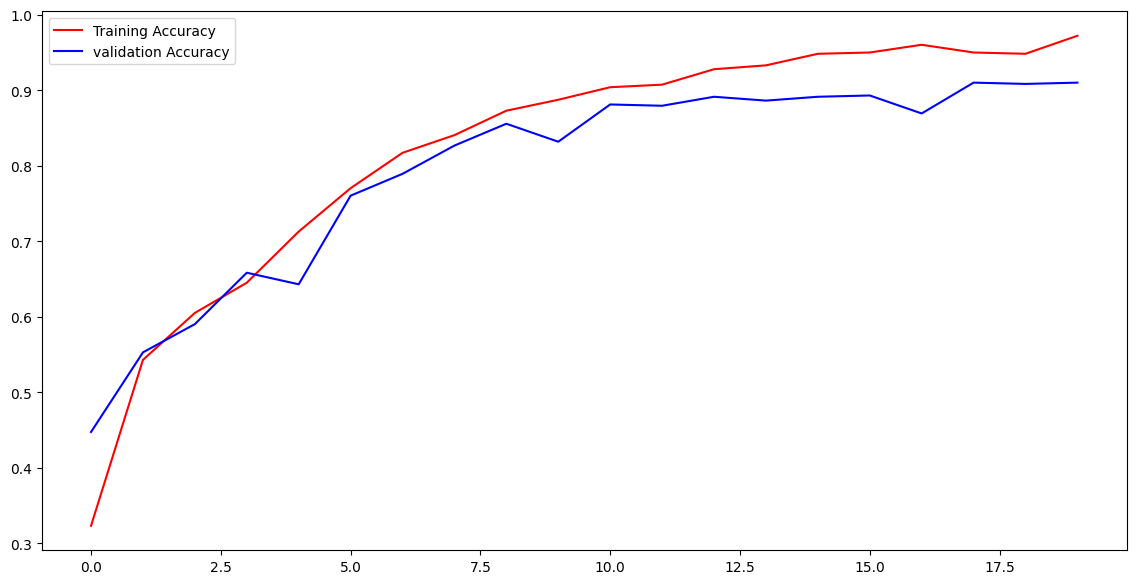

In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize = (14,7))
plt.plot(epochs, acc, 'r', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', label = 'validation Accuracy')
plt.legend(loc = 'upper left')
plt.show()

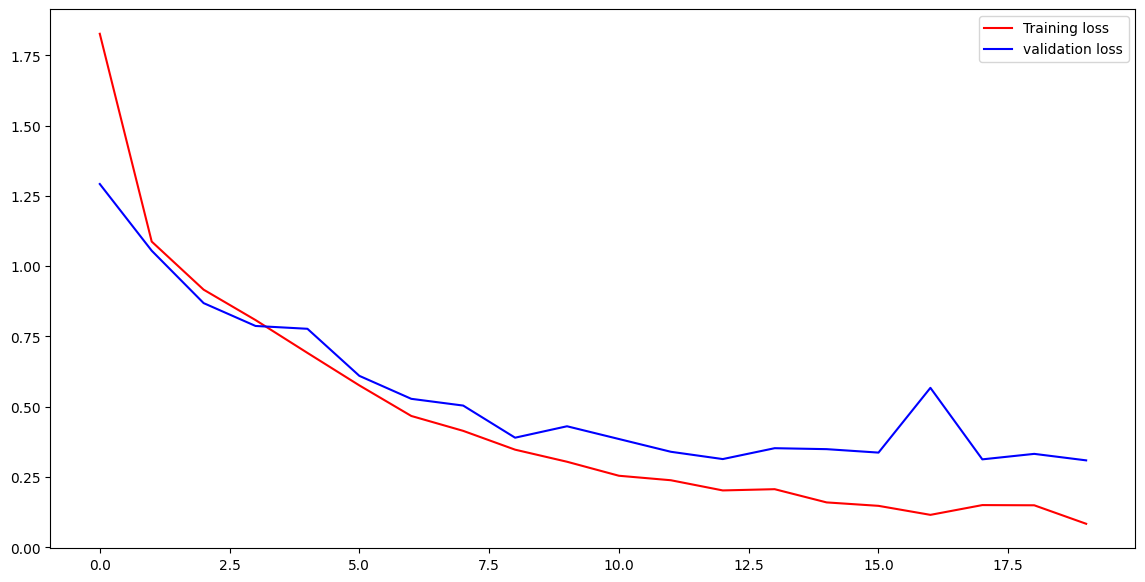

In [15]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize = (14,7))
plt.plot(epochs, loss, 'r', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'validation loss')
plt.legend(loc = 'upper right')
plt.show()

Prediction

In [16]:
#saving model
model.save('braintumor.h5')

In [17]:
img = cv2.imread('/content/Training/pituitary_tumor/p (107).jpg')
img = cv2.resize(img, (150,150))
img_array = np.array(img)
img_array.shape

(150, 150, 3)

In [18]:
img_array = img_array.reshape(1, 150, 150, 3)
img_array.shape

(1, 150, 150, 3)

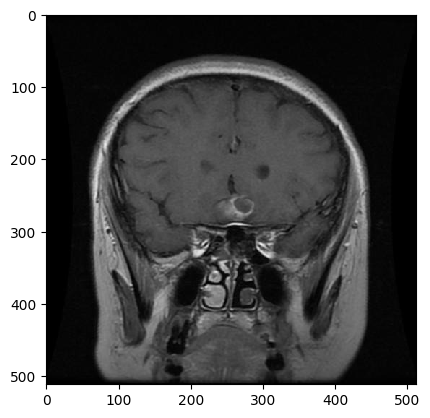

In [19]:
from tensorflow.keras.preprocessing import image
img = image.load_img('/content/Training/pituitary_tumor/p (107).jpg')
plt.imshow(img, interpolation = 'nearest')

In [20]:
a = model.predict(img_array)
indices = a.argmax()
indices

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


3